# Author : `Mohammad AliAbadi`
# Gmail : `aliabadi4mohammad`
# Lisence : `shahid beheshti university`

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
from keras.datasets import cifar10

import os

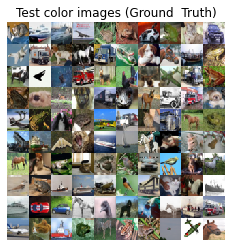

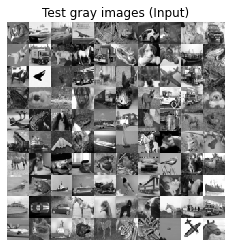

In [0]:
def rgb2gray(rgb):
    """Convert from color image (RGB) to grayscale.
       Source: opencv.org
       grayscale = 0.299*red + 0.587*green + 0.114*blue
    Argument:
        rgb (tensor): rgb image
    Return:
        (tensor): grayscale image
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


# load the CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
# we assume data format "channels_last"
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

# create saved_images folder
imgs_dir = 'saved_images'
save_dir = os.path.join(os.getcwd(), imgs_dir)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

# display the 1st 100 input images (color and gray)
imgs = x_test[:100]
imgs = imgs.reshape((10, 10, img_rows, img_cols, channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Test color images (Ground  Truth)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/test_color.png' % imgs_dir)
plt.show()

# convert color train and test images to gray
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

# display grayscale version of test images
imgs = x_test_gray[:100]
imgs = imgs.reshape((10, 10, img_rows, img_cols))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Test gray images (Input)')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('%s/test_gray.png' % imgs_dir)
plt.show()



In [0]:
X_train = x_train_gray
X_test = x_test_gray

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 50000 and each image is of shape (32, 32)
Number of test examples : 10000 and each image is of shape (32, 32)


In [0]:
img_rows, img_cols = 32, 32

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train =X_train.astype('float32')
x_test = X_test.astype('float32')

In [0]:
print(X_train[0])

[[[ 61.217]
  [ 44.989]
  [ 48.028]
  ...
  [137.038]
  [130.451]
  [128.782]]

 [[ 18.804]
  [  0.   ]
  [ 10.078]
  ...
  [ 94.703]
  [ 90.002]
  [ 94.045]]

 [[ 23.957]
  [  8.893]
  [ 31.412]
  ...
  [ 90.29 ]
  [ 90.888]
  [ 80.23 ]]

 ...

 [[172.926]
  [153.786]
  [156.673]
  ...
  [133.891]
  [ 35.739]
  [ 38.085]]

 [[146.357]
  [128.716]
  [143.562]
  ...
  [152.608]
  [ 69.273]
  [ 59.804]]

 [[150.675]
  [136.671]
  [146.793]
  ...
  [188.552]
  [123.991]
  [ 98.989]]]


In [0]:


X_train = X_train/255
X_test = X_test/255

In [0]:
print(X_train[0])

[[[0.24006667]
  [0.17642745]
  [0.1883451 ]
  ...
  [0.53740392]
  [0.51157255]
  [0.50502745]]

 [[0.07374118]
  [0.        ]
  [0.03952157]
  ...
  [0.37138431]
  [0.35294902]
  [0.36880392]]

 [[0.09394902]
  [0.03487451]
  [0.12318431]
  ...
  [0.35407843]
  [0.35642353]
  [0.31462745]]

 ...

 [[0.67814118]
  [0.60308235]
  [0.61440392]
  ...
  [0.52506275]
  [0.14015294]
  [0.14935294]]

 [[0.57394902]
  [0.50476863]
  [0.56298824]
  ...
  [0.59846275]
  [0.27165882]
  [0.23452549]]

 [[0.59088235]
  [0.53596471]
  [0.57565882]
  ...
  [0.73941961]
  [0.48623922]
  [0.38819216]]]


In [0]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 1)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# 2 layers Kernel (3,3) : 

## Architecture 300-150 

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 170us/step - loss: 1.8295 - accuracy: 0.3319 - val_loss: 1.4997 - val_accuracy: 0.4733
Epoch 2/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.5142 - accuracy: 0.4628 - val_loss: 1.3237 - val_accuracy: 0.5377
Epoch 3/10
50000/50000 [==============================] - 8s 164us/step - loss: 1.3989 - accuracy: 0.5073 - val_loss: 1.2083 - val_accuracy: 0.5861
Epoch 4/10
50000/50000 [==============================] - 8s 162us/step - loss: 1.3286 - accuracy: 0.5354 - val_loss: 1.1789 - val_accuracy: 0.5977
Epoch 5/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.2729 - accuracy: 0.5562 - val_loss: 1.1062 - val_accuracy: 0.6165
Epoch 6/10
50000/50000 [==============================] - 8s 161us/step - loss: 1.2212 - accuracy: 0.5752 - val_loss: 1.1131 - val_accuracy: 0.6164
Epoch 7/10
50000/50000 [==============================] - 8s 1

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

In [0]:
## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 180us/step - loss: 1.7974 - accuracy: 0.3467 - val_loss: 1.4620 - val_accuracy: 0.4900
Epoch 2/10
50000/50000 [==============================] - 9s 172us/step - loss: 1.4789 - accuracy: 0.4748 - val_loss: 1.2501 - val_accuracy: 0.5657
Epoch 3/10
50000/50000 [==============================] - 9s 170us/step - loss: 1.3448 - accuracy: 0.5244 - val_loss: 1.1805 - val_accuracy: 0.5899
Epoch 4/10
50000/50000 [==============================] - 9s 170us/step - loss: 1.2802 - accuracy: 0.5500 - val_loss: 1.1063 - val_accuracy: 0.6164
Epoch 5/10
50000/50000 [==============================] - 9s 170us/step - loss: 1.2091 - accuracy: 0.5735 - val_loss: 1.0615 - val_accuracy: 0.6329
Epoch 6/10
50000/50000 [==============================] - 9s 171us/step - loss: 1.1695 - accuracy: 0.5876 - val_loss: 1.0612 - val_accuracy: 0.6323
Epoch 7/10
50000/50000 [==============================] - 9s 1

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

In [0]:
%matplotlib inline
!python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>'


In [0]:
## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 12
from keras.layers.normalization import BatchNormalization


model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.25))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 12s 241us/step - loss: 1.9292 - accuracy: 0.3969 - val_loss: 1.4038 - val_accuracy: 0.5132
Epoch 2/12
50000/50000 [==============================] - 12s 231us/step - loss: 1.3420 - accuracy: 0.5332 - val_loss: 1.3995 - val_accuracy: 0.4886
Epoch 3/12
50000/50000 [==============================] - 12s 232us/step - loss: 1.1769 - accuracy: 0.5941 - val_loss: 1.2561 - val_accuracy: 0.5756
Epoch 4/12
50000/50000 [==============================] - 12s 234us/step - loss: 1.0840 - accuracy: 0.6254 - val_loss: 1.8269 - val_accuracy: 0.4672
Epoch 5/12
50000/50000 [==============================] - 12s 233us/step - loss: 1.0058 - accuracy: 0.6514 - val_loss: 1.2645 - val_accuracy: 0.5714
Epoch 6/12
50000/50000 [==============================] - 12s 231us/step - loss: 0.9482 - accuracy: 0.6718 - val_loss: 0.9549 - val_accuracy: 0.6699
Epoch 7/12
50000/50000 [==============================] 

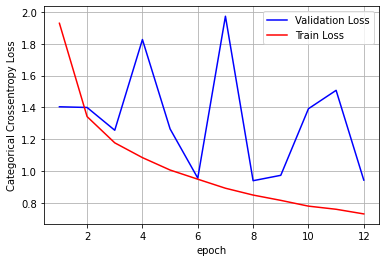

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

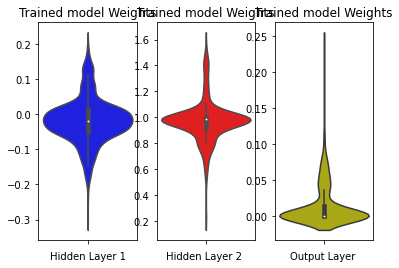

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 12
from keras.layers.normalization import BatchNormalization


model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.25))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 13s 256us/step - loss: 1.9398 - accuracy: 0.2970 - val_loss: 1.5645 - val_accuracy: 0.4195
Epoch 2/12
50000/50000 [==============================] - 12s 247us/step - loss: 1.5821 - accuracy: 0.4230 - val_loss: 1.4649 - val_accuracy: 0.4910
Epoch 3/12
50000/50000 [==============================] - 12s 246us/step - loss: 1.4035 - accuracy: 0.4946 - val_loss: 1.4962 - val_accuracy: 0.4878
Epoch 4/12
50000/50000 [==============================] - 12s 246us/step - loss: 1.2895 - accuracy: 0.5446 - val_loss: 1.1839 - val_accuracy: 0.5905
Epoch 5/12
50000/50000 [==============================] - 12s 248us/step - loss: 1.2125 - accuracy: 0.5740 - val_loss: 1.4886 - val_accuracy: 0.4951
Epoch 6/12
50000/50000 [==============================] - 12s 246us/step - loss: 1.1391 - accuracy: 0.6043 - val_loss: 1.2532 - val_accuracy: 0.5873
Epoch 7/12
50000/50000 [==============================] 

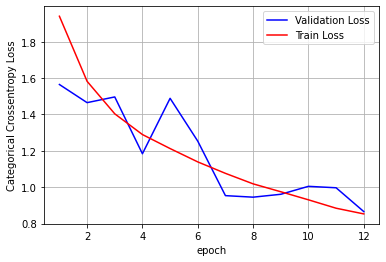

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

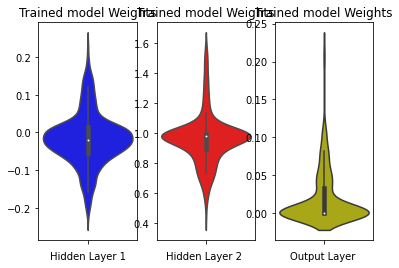

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layers Kernel (3,3) :


## Architecture 512-264-132 

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 435us/step - loss: 1.7578 - accuracy: 0.3803 - val_loss: 1.6434 - val_accuracy: 0.4241
Epoch 2/10
50000/50000 [==============================] - 21s 415us/step - loss: 1.3191 - accuracy: 0.5359 - val_loss: 1.1934 - val_accuracy: 0.5812
Epoch 3/10
50000/50000 [==============================] - 21s 414us/step - loss: 1.1164 - accuracy: 0.6132 - val_loss: 1.1149 - val_accuracy: 0.6195
Epoch 4/10
50000/50000 [==============================] - 21s 416us/step - loss: 0.9983 - accuracy: 0.6538 - val_loss: 0.9889 - val_accuracy: 0.6612
Epoch 5/10
50000/50000 [==============================] - 21s 416us/step - loss: 0.9009 - accuracy: 0.6911 - val_loss: 1.3791 - val_accuracy: 0.5565
Epoch 6/10
50000/50000 [==============================] - 21s 418us/step - loss: 0.8395 - accuracy: 0.7104 - val_loss: 0.8861 - val_accuracy: 0.6993
Epoch 7/10
50000/50000 [==============================] 

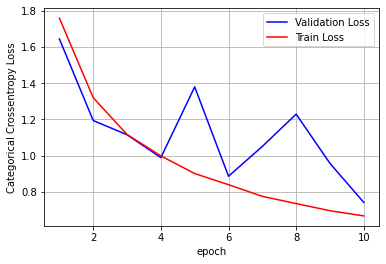

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

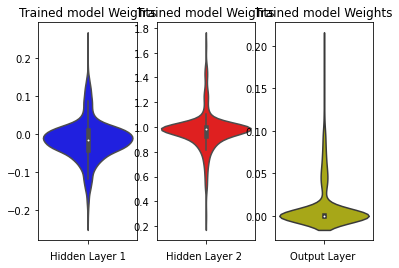

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (3,3) :

## Architecture 400-350-150-75  

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 435us/step - loss: 1.7866 - accuracy: 0.3731 - val_loss: 1.5927 - val_accuracy: 0.4183
Epoch 2/10
50000/50000 [==============================] - 21s 411us/step - loss: 1.2496 - accuracy: 0.5586 - val_loss: 1.1987 - val_accuracy: 0.5839
Epoch 3/10
50000/50000 [==============================] - 21s 414us/step - loss: 1.0561 - accuracy: 0.6335 - val_loss: 1.2190 - val_accuracy: 0.5818
Epoch 4/10
50000/50000 [==============================] - 21s 410us/step - loss: 0.9311 - accuracy: 0.6766 - val_loss: 0.8757 - val_accuracy: 0.6927
Epoch 5/10
50000/50000 [==============================] - 21s 411us/step - loss: 0.8475 - accuracy: 0.7070 - val_loss: 1.2276 - val_accuracy: 0.5987
Epoch 6/10
50000/50000 [==============================] - 20s 409us/step - loss: 0.7835 - accuracy: 0.7295 - val_loss: 0.8158 - val_accuracy: 0.7151
Epoch 7/10
50000/50000 [==============================] 

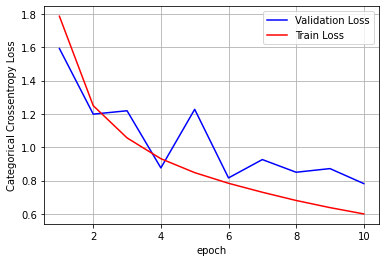

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

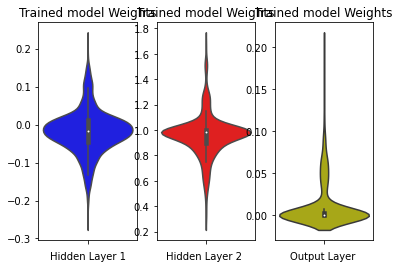

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
# 2 Layers Kernel (5,5) :

In [0]:
## Architecture 300-150

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 179us/step - loss: 1.7934 - accuracy: 0.3482 - val_loss: 1.4646 - val_accuracy: 0.4820
Epoch 2/10
50000/50000 [==============================] - 9s 171us/step - loss: 1.5040 - accuracy: 0.4722 - val_loss: 1.3421 - val_accuracy: 0.5263
Epoch 3/10
50000/50000 [==============================] - 9s 173us/step - loss: 1.3749 - accuracy: 0.5159 - val_loss: 1.2176 - val_accuracy: 0.5787
Epoch 4/10
50000/50000 [==============================] - 9s 171us/step - loss: 1.2815 - accuracy: 0.5528 - val_loss: 1.2201 - val_accuracy: 0.5754
Epoch 5/10
50000/50000 [==============================] - 9s 172us/step - loss: 1.2228 - accuracy: 0.5746 - val_loss: 1.0918 - val_accuracy: 0.6218
Epoch 6/10
50000/50000 [==============================] - 9s 172us/step - loss: 1.1667 - accuracy: 0.5955 - val_loss: 1.0560 - val_accuracy: 0.6365
Epoch 7/10
50000/50000 [==============================] - 9s 1

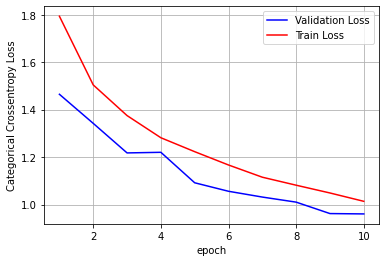

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

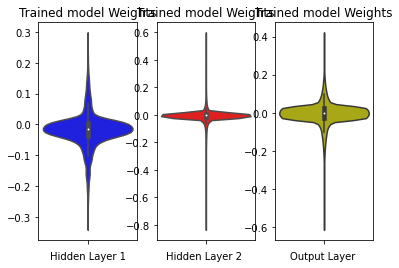

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.7964 - accuracy: 0.3448 - val_loss: 1.5209 - val_accuracy: 0.4526
Epoch 2/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.4763 - accuracy: 0.4769 - val_loss: 1.2892 - val_accuracy: 0.5580
Epoch 3/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.3346 - accuracy: 0.5287 - val_loss: 1.2432 - val_accuracy: 0.5741
Epoch 4/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.2493 - accuracy: 0.5611 - val_loss: 1.1398 - val_accuracy: 0.6080
Epoch 5/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.1872 - accuracy: 0.5882 - val_loss: 1.0718 - val_accuracy: 0.6311
Epoch 6/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.1230 - accuracy: 0.6072 - val_loss: 1.0212 - val_accuracy: 0.6467
Epoch 7/10
50000/50000 [==============================] 

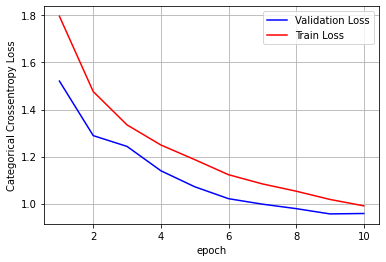

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

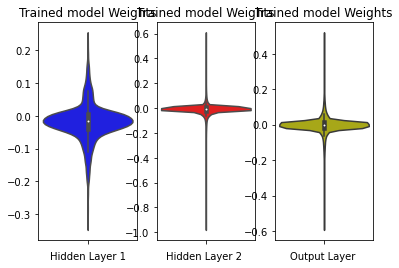

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 15s 299us/step - loss: 2.1402 - accuracy: 0.1975 - val_loss: 2.0581 - val_accuracy: 0.2119
Epoch 2/15
50000/50000 [==============================] - 14s 290us/step - loss: 1.8545 - accuracy: 0.2977 - val_loss: 1.9547 - val_accuracy: 0.3071
Epoch 3/15
50000/50000 [==============================] - 14s 290us/step - loss: 1.6469 - accuracy: 0.3908 - val_loss: 1.5025 - val_accuracy: 0.4611
Epoch 4/15
50000/50000 [==============================] - 15s 290us/step - loss: 1.4552 - accuracy: 0.4798 - val_loss: 1.3682 - val_accuracy: 0.5255
Epoch 5/15
50000/50000 [==============================] - 15s 291us/step - loss: 1.3110 - accuracy: 0.5350 - val_loss: 1.5717 - val_accuracy: 0.4522
Epoch 6/15
50000/50000 [==============================] - 15s 294us/step - loss: 1.2045 - accuracy: 0.5812 - val_loss: 1.3743 - val_accuracy: 0.5444
Epoch 7/15
50000/50000 [==============================] 

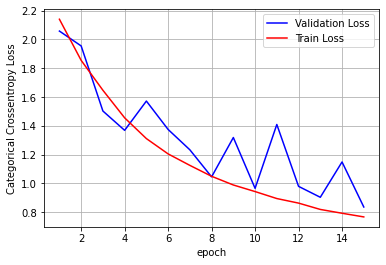

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

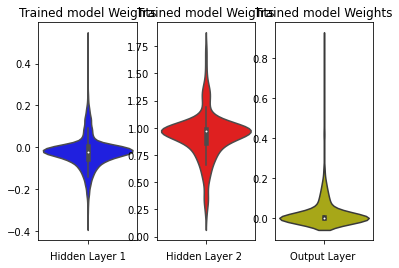

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 245us/step - loss: 1.9669 - accuracy: 0.3677 - val_loss: 1.6129 - val_accuracy: 0.4279
Epoch 2/15
50000/50000 [==============================] - 12s 236us/step - loss: 1.3955 - accuracy: 0.5095 - val_loss: 1.5513 - val_accuracy: 0.4638
Epoch 3/15
50000/50000 [==============================] - 12s 237us/step - loss: 1.2196 - accuracy: 0.5762 - val_loss: 1.8488 - val_accuracy: 0.4010
Epoch 4/15
50000/50000 [==============================] - 12s 239us/step - loss: 1.1107 - accuracy: 0.6118 - val_loss: 1.2465 - val_accuracy: 0.5636
Epoch 5/15
50000/50000 [==============================] - 12s 238us/step - loss: 1.0350 - accuracy: 0.6394 - val_loss: 1.1855 - val_accuracy: 0.6003
Epoch 6/15
50000/50000 [==============================] - 12s 236us/step - loss: 0.9701 - accuracy: 0.6614 - val_loss: 1.2174 - val_accuracy: 0.5908
Epoch 7/15
50000/50000 [==============================] 

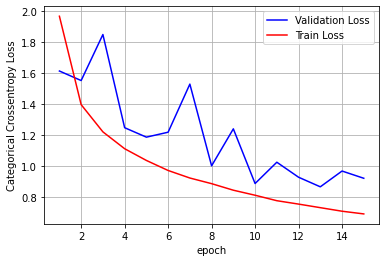

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

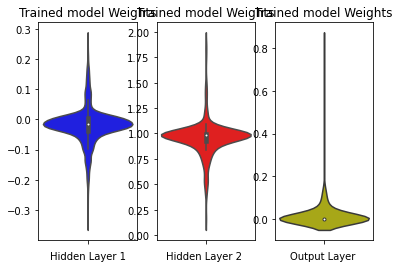

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layers Kernel (5,5) :

## Architecture 512-264-132

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 568us/step - loss: 1.8326 - accuracy: 0.3522 - val_loss: 2.7481 - val_accuracy: 0.2544
Epoch 2/10
50000/50000 [==============================] - 27s 547us/step - loss: 1.3639 - accuracy: 0.5181 - val_loss: 1.6188 - val_accuracy: 0.4523
Epoch 3/10
50000/50000 [==============================] - 27s 544us/step - loss: 1.1415 - accuracy: 0.6031 - val_loss: 1.2877 - val_accuracy: 0.5580
Epoch 4/10
50000/50000 [==============================] - 27s 545us/step - loss: 0.9994 - accuracy: 0.6564 - val_loss: 2.5047 - val_accuracy: 0.3653
Epoch 5/10
50000/50000 [==============================] - 27s 547us/step - loss: 0.8955 - accuracy: 0.6928 - val_loss: 1.1554 - val_accuracy: 0.6034
Epoch 6/10
50000/50000 [==============================] - 27s 544us/step - loss: 0.8109 - accuracy: 0.7210 - val_loss: 0.9861 - val_accuracy: 0.6661
Epoch 7/10
50000/50000 [==============================] 

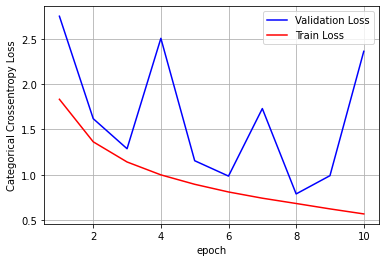

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

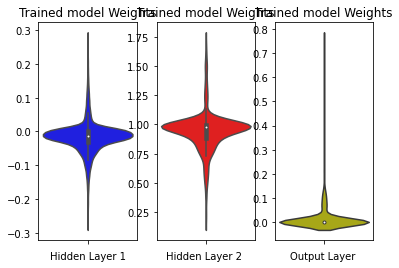

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (5,5) :

## Architecture 400-350-150-75  

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 29s 588us/step - loss: 1.7753 - accuracy: 0.3679 - val_loss: 1.4972 - val_accuracy: 0.4721
Epoch 2/10
50000/50000 [==============================] - 28s 563us/step - loss: 1.2666 - accuracy: 0.5536 - val_loss: 1.6338 - val_accuracy: 0.4542
Epoch 3/10
50000/50000 [==============================] - 28s 564us/step - loss: 1.0483 - accuracy: 0.6372 - val_loss: 1.4241 - val_accuracy: 0.5184
Epoch 4/10
50000/50000 [==============================] - 28s 566us/step - loss: 0.8976 - accuracy: 0.6929 - val_loss: 1.0493 - val_accuracy: 0.6396
Epoch 5/10
50000/50000 [==============================] - 28s 564us/step - loss: 0.7871 - accuracy: 0.7313 - val_loss: 0.8580 - val_accuracy: 0.7026
Epoch 6/10
50000/50000 [==============================] - 28s 562us/step - loss: 0.6972 - accuracy: 0.7641 - val_loss: 1.1925 - val_accuracy: 0.6225
Epoch 7/10
50000/50000 [==============================] 

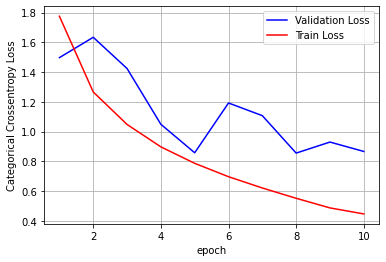

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

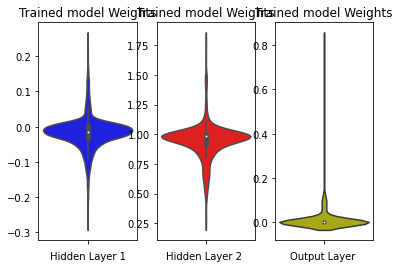

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
# 2 Layers Kernel (7,7) :

## Architecture 300-150

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 6



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 10s 201us/step - loss: 1.8521 - accuracy: 0.3281 - val_loss: 1.6362 - val_accuracy: 0.4165
Epoch 2/6
50000/50000 [==============================] - 10s 193us/step - loss: 1.6005 - accuracy: 0.4311 - val_loss: 1.4882 - val_accuracy: 0.4724
Epoch 3/6
50000/50000 [==============================] - 10s 194us/step - loss: 1.4869 - accuracy: 0.4764 - val_loss: 1.3717 - val_accuracy: 0.5258
Epoch 4/6
50000/50000 [==============================] - 10s 193us/step - loss: 1.3909 - accuracy: 0.5120 - val_loss: 1.2892 - val_accuracy: 0.5464
Epoch 5/6
50000/50000 [==============================] - 10s 193us/step - loss: 1.3194 - accuracy: 0.5382 - val_loss: 1.2415 - val_accuracy: 0.5632
Epoch 6/6
50000/50000 [==============================] - 10s 194us/step - loss: 1.2503 - accuracy: 0.5628 - val_loss: 1.1705 - val_accuracy: 0.5897
Test loss: 1.1704509412765502
Test accuracy: 0.589699983596801

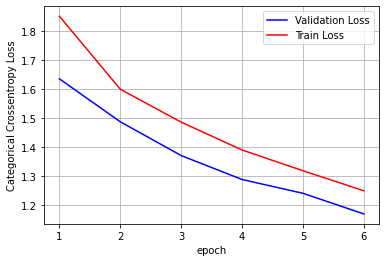

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

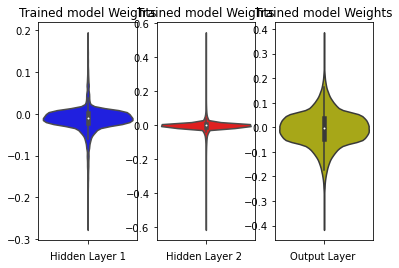

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 6



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 15s 304us/step - loss: 1.8599 - accuracy: 0.3210 - val_loss: 1.5213 - val_accuracy: 0.4536
Epoch 2/6
50000/50000 [==============================] - 15s 299us/step - loss: 1.5521 - accuracy: 0.4488 - val_loss: 1.3323 - val_accuracy: 0.5272
Epoch 3/6
50000/50000 [==============================] - 15s 294us/step - loss: 1.4021 - accuracy: 0.5042 - val_loss: 1.2540 - val_accuracy: 0.5527
Epoch 4/6
50000/50000 [==============================] - 15s 293us/step - loss: 1.3080 - accuracy: 0.5374 - val_loss: 1.1842 - val_accuracy: 0.5917
Epoch 5/6
50000/50000 [==============================] - 15s 293us/step - loss: 1.2332 - accuracy: 0.5676 - val_loss: 1.1500 - val_accuracy: 0.5978
Epoch 6/6
50000/50000 [==============================] - 15s 294us/step - loss: 1.1708 - accuracy: 0.5906 - val_loss: 1.0679 - val_accuracy: 0.6280
Test loss: 1.0679260391235352
Test accuracy: 0.628000020980835

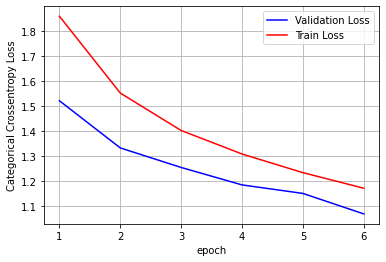

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

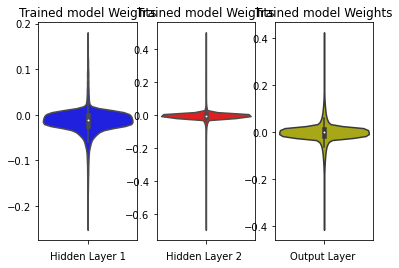

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 265us/step - loss: 1.9965 - accuracy: 0.3242 - val_loss: 2.1223 - val_accuracy: 0.2989
Epoch 2/10
50000/50000 [==============================] - 13s 254us/step - loss: 1.5169 - accuracy: 0.4609 - val_loss: 1.5666 - val_accuracy: 0.4434
Epoch 3/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.3490 - accuracy: 0.5254 - val_loss: 2.1671 - val_accuracy: 0.3846
Epoch 4/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.2400 - accuracy: 0.5667 - val_loss: 1.5783 - val_accuracy: 0.4486
Epoch 5/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.1626 - accuracy: 0.5968 - val_loss: 1.1465 - val_accuracy: 0.5965
Epoch 6/10
50000/50000 [==============================] - 13s 254us/step - loss: 1.1019 - accuracy: 0.6144 - val_loss: 1.2118 - val_accuracy: 0.5824
Epoch 7/10
50000/50000 [==============================] 

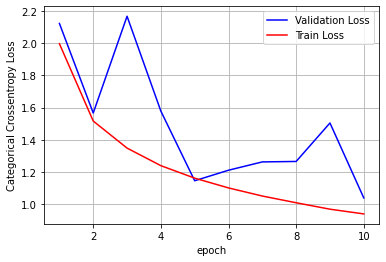

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

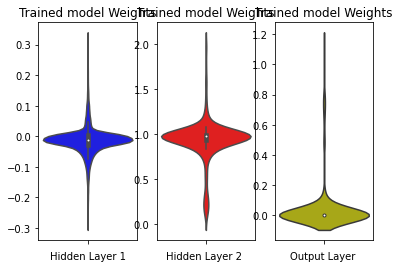

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 19s 384us/step - loss: 2.1672 - accuracy: 0.1862 - val_loss: 2.0856 - val_accuracy: 0.1947
Epoch 2/15
50000/50000 [==============================] - 19s 374us/step - loss: 1.9334 - accuracy: 0.2537 - val_loss: 1.9478 - val_accuracy: 0.2814
Epoch 3/15
50000/50000 [==============================] - 18s 370us/step - loss: 1.7650 - accuracy: 0.3258 - val_loss: 9.0762 - val_accuracy: 0.1607
Epoch 4/15
50000/50000 [==============================] - 19s 373us/step - loss: 1.5935 - accuracy: 0.4087 - val_loss: 1.5163 - val_accuracy: 0.4934
Epoch 5/15
50000/50000 [==============================] - 18s 370us/step - loss: 1.4365 - accuracy: 0.4794 - val_loss: 3.0644 - val_accuracy: 0.3536
Epoch 6/15
50000/50000 [==============================] - 19s 370us/step - loss: 1.3156 - accuracy: 0.5309 - val_loss: 1.1548 - val_accuracy: 0.6027
Epoch 7/15
50000/50000 [==============================] 

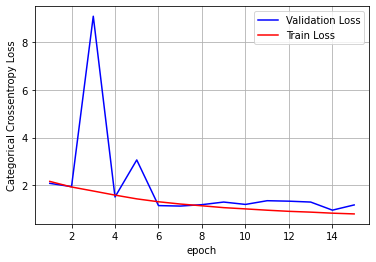

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

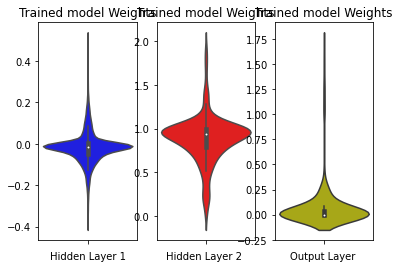

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
# 3 Layers Kernel (7,7) :

## Architecture 512-264-132

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 827us/step - loss: 1.9333 - accuracy: 0.3053 - val_loss: 1.9753 - val_accuracy: 0.3319
Epoch 2/10
50000/50000 [==============================] - 40s 794us/step - loss: 1.5010 - accuracy: 0.4614 - val_loss: 2.3615 - val_accuracy: 0.2186
Epoch 3/10
50000/50000 [==============================] - 40s 793us/step - loss: 1.2427 - accuracy: 0.5662 - val_loss: 1.8659 - val_accuracy: 0.4020
Epoch 4/10
50000/50000 [==============================] - 40s 792us/step - loss: 1.0713 - accuracy: 0.6305 - val_loss: 1.2269 - val_accuracy: 0.5888
Epoch 5/10
50000/50000 [==============================] - 40s 794us/step - loss: 0.9501 - accuracy: 0.6733 - val_loss: 1.2592 - val_accuracy: 0.5664
Epoch 6/10
50000/50000 [==============================] - 40s 800us/step - loss: 0.8325 - accuracy: 0.7120 - val_loss: 0.9547 - val_accuracy: 0.6681
Epoch 7/10
50000/50000 [==============================] 

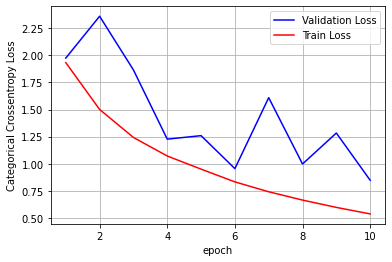

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

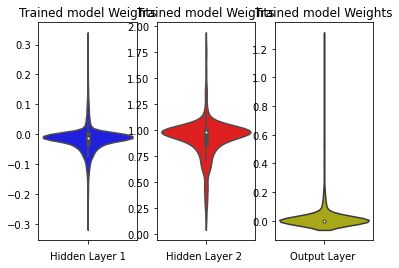

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (7,7) :

## Architecture 400-350-150-75

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 44s 872us/step - loss: 1.8584 - accuracy: 0.3357 - val_loss: 1.5738 - val_accuracy: 0.4262
Epoch 2/10
50000/50000 [==============================] - 42s 841us/step - loss: 1.3605 - accuracy: 0.5171 - val_loss: 2.0676 - val_accuracy: 0.3644
Epoch 3/10
50000/50000 [==============================] - 42s 839us/step - loss: 1.0839 - accuracy: 0.6239 - val_loss: 1.5737 - val_accuracy: 0.4730
Epoch 4/10
50000/50000 [==============================] - 42s 840us/step - loss: 0.9142 - accuracy: 0.6877 - val_loss: 1.0514 - val_accuracy: 0.6484
Epoch 5/10
50000/50000 [==============================] - 42s 840us/step - loss: 0.7802 - accuracy: 0.7343 - val_loss: 0.9563 - val_accuracy: 0.6798
Epoch 6/10
50000/50000 [==============================] - 42s 838us/step - loss: 0.6729 - accuracy: 0.7722 - val_loss: 0.8900 - val_accuracy: 0.7015
Epoch 7/10
50000/50000 [==============================] 

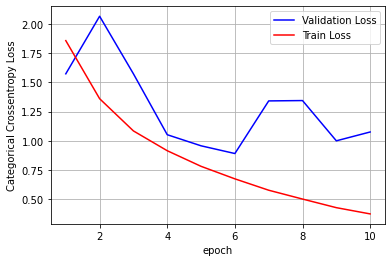

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

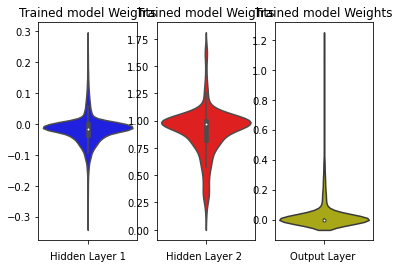

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()